In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# from tensorflow.keras.layers import Dense, Dropout

In [ ]:
os.listdir()

['.config',
 'train_data.npy',
 'train_target.npy',
 'test_target.npy',
 'test_data.npy',
 'sample_data']

In [ ]:
train_data = np.load("train_data.npy")
train_target = np.load("train_target.npy")
test_data = np.load("test_data.npy")
test_target = np.load("test_target.npy")

In [ ]:
model = keras.Sequential([
    layers.Dense(64, input_shape=(train_data.shape[1], ), activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "mse",
    metrics=["mae"]
)

In [ ]:
epoch = 500
batch_size = 32

In [ ]:
history = model.fit(train_data, train_target, epochs=epoch, batch_size=batch_size, validation_split=0.2)

Epoch 1/500
8/8 [==============================] - 1s 24ms/step - loss: 551.5534 - mae: 22.2117 - val_loss: 551.5790 - val_mae: 22.1721
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 514.7364 - mae: 21.3873 - val_loss: 510.0704 - val_mae: 21.2458
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 473.7611 - mae: 20.4510 - val_loss: 460.8431 - val_mae: 20.1076
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 422.9859 - mae: 19.2475 - val_loss: 402.1557 - val_mae: 18.6652
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 363.4715 - mae: 17.7385 - val_loss: 332.9267 - val_mae: 16.8281
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 297.6144 - mae: 15.8698 - val_loss: 255.9746 - val_mae: 14.5401
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 224.0559 - mae: 13.5557 - val_loss: 180.4419 - val_mae: 11.9176
Epoch 8/500
8/8 [==============================] - 0s 

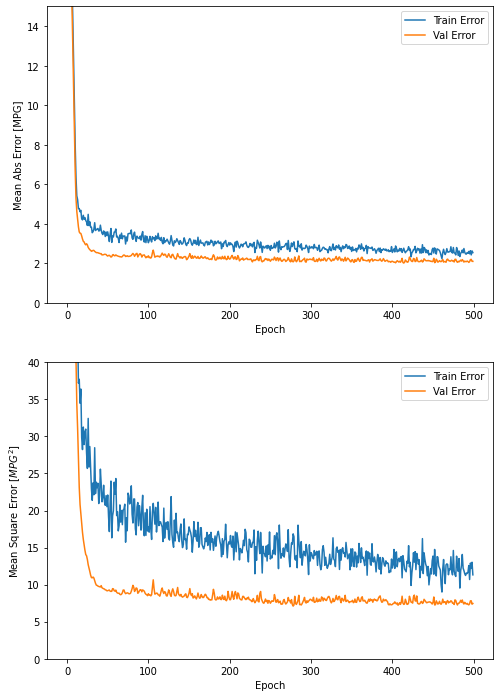

In [ ]:
import matplotlib.pyplot as plt

# 시각화
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,15])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,40])
  plt.legend()
  plt.show()

plot_history(history)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, input_shape=(train_data.shape[1], ), activation="relu"),
    layers.Dropout(0.3), # dropout
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2), # dropout
    layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "mse",
    metrics=["mae"]
)

In [ ]:
history = model.fit(train_data, train_target, epochs=epoch, batch_size=batch_size, validation_split=0.2)

Epoch 1/500
8/8 [==============================] - 1s 20ms/step - loss: 576.5407 - mae: 22.6930 - val_loss: 589.6196 - val_mae: 22.9203
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 550.1485 - mae: 22.0871 - val_loss: 558.1951 - val_mae: 22.1769
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 520.3929 - mae: 21.3337 - val_loss: 522.4439 - val_mae: 21.2968
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 483.0150 - mae: 20.4344 - val_loss: 479.3453 - val_mae: 20.2014
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 441.6360 - mae: 19.2743 - val_loss: 426.6903 - val_mae: 18.8003
Epoch 6/500
8/8 [==============================] - 0s 4ms/step - loss: 396.9942 - mae: 17.9747 - val_loss: 366.1787 - val_mae: 17.1126
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 339.1093 - mae: 16.3688 - val_loss: 298.4436 - val_mae: 15.2042
Epoch 8/500
8/8 [==============================] - 0s 

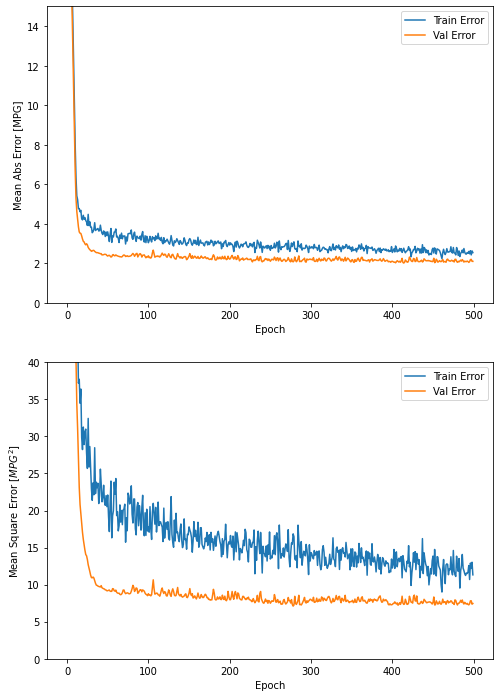

In [ ]:
plot_history(history)

In [ ]:
# 규제
model = keras.Sequential([
    layers.Dense(64, kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.L2() , input_shape=(train_data.shape[1], ), activation="relu"),
    layers.Dense(64, kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.L2() , activation="relu"),
    layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "mse",
    metrics=["mae"]
)

In [ ]:
history = model.fit(train_data, train_target, epochs=epoch, batch_size=batch_size, validation_split=0.2)

Epoch 1/500
8/8 [==============================] - 1s 22ms/step - loss: 563.7282 - mae: 22.3723 - val_loss: 541.8746 - val_mae: 21.7632
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 499.9590 - mae: 20.8416 - val_loss: 472.3244 - val_mae: 20.0672
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 436.6233 - mae: 19.2629 - val_loss: 406.3703 - val_mae: 18.3130
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 375.1066 - mae: 17.5817 - val_loss: 338.7039 - val_mae: 16.4420
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 313.0430 - mae: 15.8353 - val_loss: 271.1954 - val_mae: 14.5047
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 248.6995 - mae: 13.9338 - val_loss: 206.5840 - val_mae: 12.5458
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 191.5980 - mae: 12.0352 - val_loss: 147.5866 - val_mae: 10.5267
Epoch 8/500
8/8 [==============================] - 0s 

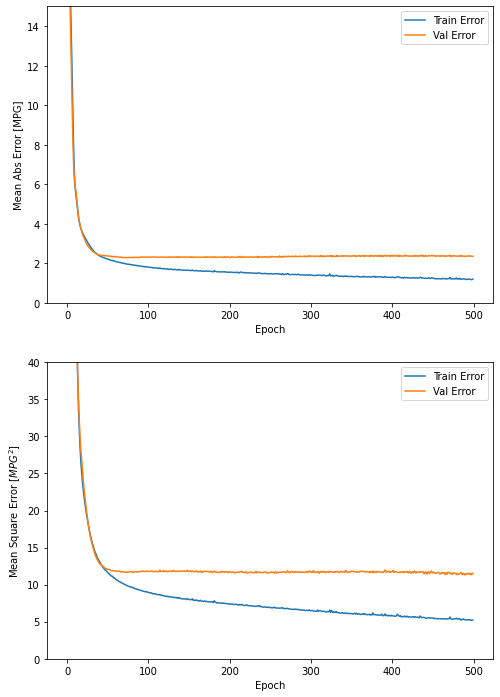

In [ ]:
plot_history(history)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold =  KFold(n_splits=5, random_state=123, shuffle=True)

In [ ]:
# for (train_index, val_index) in kfold.split(train_data):
#     train_x = train_data[train_index]
#     train_y = train_data[train_index]

#     val_x = train_data[val_index]
#     val_y = train_data[val_index]
#     # 학습
#     ...

In [ ]:
# callback
# ealystopping
model = keras.Sequential([
    layers.Dense(64, input_shape=(train_data.shape[1], ), activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])
model.compile(
    optimizer = "adam",
    loss = "mse",
    metrics=["mae"]
)

In [ ]:
earlystopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

In [ ]:
history = model.fit(train_data, train_target, batch_size=batch_size, epochs=epoch, validation_split=0.2,
                    callbacks=[earlystopping])

Epoch 1/500
8/8 [==============================] - 0s 20ms/step - loss: 575.7919 - mae: 22.7258 - val_loss: 582.7506 - val_mae: 22.8591
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 546.6555 - mae: 22.1090 - val_loss: 548.7010 - val_mae: 22.1447
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 512.2726 - mae: 21.3805 - val_loss: 507.9133 - val_mae: 21.2619
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 471.0815 - mae: 20.4593 - val_loss: 457.1389 - val_mae: 20.1230
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 417.8507 - mae: 19.2449 - val_loss: 395.3709 - val_mae: 18.6540
Epoch 6/500
8/8 [==============================] - 0s 4ms/step - loss: 356.9489 - mae: 17.7173 - val_loss: 320.9249 - val_mae: 16.7295
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 284.1033 - mae: 15.7415 - val_loss: 240.0715 - val_mae: 14.3286
Epoch 8/500
8/8 [==============================] - 0s 

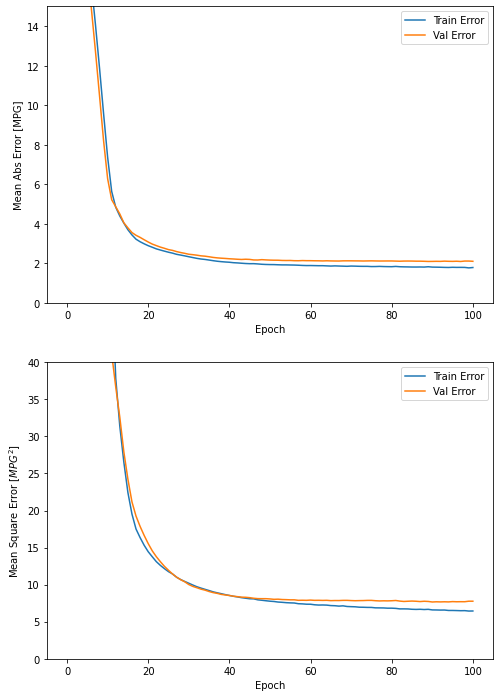

In [ ]:
plot_history(history)

In [ ]:
# modelcheckpoint -> model save
model = keras.Sequential([
    layers.Dense(64, input_shape=(train_data.shape[1], ), activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])
model.compile(
    optimizer = "adam",
    loss = "mse",
    metrics=["mae"]
)

In [ ]:
# 현재 디렉토리 위치 확인
os.getcwd()

'/content'

In [ ]:
# ".." 상위 디렉토리 , "." 현재 디렉토리

In [ ]:
os.listdir("../content")

['.config',
 'train_data.npy',
 'train_target.npy',
 'test_target.npy',
 'test_data.npy',
 'sample_data']

In [ ]:
os.mkdir("model")

In [ ]:
os.listdir()

['.config',
 'train_data.npy',
 'model',
 'train_target.npy',
 'test_target.npy',
 'test_data.npy',
 'sample_data']

In [ ]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="./model/{epoch}-{val_loss:.2f}_model.h5", # 경로명을 잘 정해주셔야 합니다. 모델이름 같으면 덮어씌우기가 됩니다.
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

In [ ]:
history = model.fit(train_data, train_target, batch_size=batch_size, epochs=epoch, validation_split=0.2,
                    callbacks=[earlystopping, model_checkpoint])

Epoch 1/500
8/8 [==============================] - 0s 10ms/step - loss: 5.7282 - mae: 1.6736 - val_loss: 8.1016 - val_mae: 2.1598

Epoch 00001: val_loss improved from inf to 8.10161, saving model to ./model/1-8.10_model.h5
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 5.7132 - mae: 1.6713 - val_loss: 8.0452 - val_mae: 2.1783

Epoch 00002: val_loss improved from 8.10161 to 8.04518, saving model to ./model/2-8.05_model.h5
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 5.7696 - mae: 1.6698 - val_loss: 8.0456 - val_mae: 2.1701

Epoch 00003: val_loss did not improve from 8.04518
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 5.7335 - mae: 1.6589 - val_loss: 8.1267 - val_mae: 2.1749

Epoch 00004: val_loss did not improve from 8.04518
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 5.7026 - mae: 1.6648 - val_loss: 8.1511 - val_mae: 2.1755

Epoch 00005: val_loss did not improve from 8.04518
Epoch 6/

In [ ]:
# os.listdir("./model")

In [ ]:
loaded_model = keras.models.load_model("/content/model.h5")

In [ ]:
# loaded_model.fit() 이어서 학습하면 됩니다

In [ ]:
loaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# learning rate scheduler
def exp_decay(epoch, lr):
    print("lr: ",lr)
    return lr * 0.01 ** (1/20)

In [ ]:
learning_rate_scheduler = keras.callbacks.LearningRateScheduler(exp_decay)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, input_shape=(train_data.shape[1], ), activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])
model.compile(
    optimizer = "adam",
    loss = "mse",
    metrics=["mae"]
)

In [ ]:
history = model.fit(train_data, train_target, batch_size=batch_size, epochs=epoch, validation_split=0.2,
                    callbacks=[earlystopping, model_checkpoint, learning_rate_scheduler]) # callback은 여러개 사용 가능

Epoch 1/500
lr:  7.94328075537365e-11
8/8 [==============================] - 0s 9ms/step - loss: 414.7153 - mae: 18.6244 - val_loss: 425.7072 - val_mae: 18.8057

Epoch 00001: val_loss did not improve from 8.01776
Epoch 2/500
lr:  6.309572309071143e-11
8/8 [==============================] - 0s 4ms/step - loss: 414.7153 - mae: 18.6244 - val_loss: 425.7072 - val_mae: 18.8057

Epoch 00002: val_loss did not improve from 8.01776
Epoch 3/500
lr:  5.0118714733926595e-11
8/8 [==============================] - 0s 5ms/step - loss: 414.7153 - mae: 18.6244 - val_loss: 425.7072 - val_mae: 18.8057

Epoch 00003: val_loss did not improve from 8.01776
Epoch 4/500
lr:  3.981071028391625e-11
8/8 [==============================] - 0s 5ms/step - loss: 414.7153 - mae: 18.6244 - val_loss: 425.7072 - val_mae: 18.8057

Epoch 00004: val_loss did not improve from 8.01776
Epoch 5/500
lr:  3.1622770374495346e-11
8/8 [==============================] - 0s 4ms/step - loss: 414.7153 - mae: 18.6244 - val_loss: 425.7072 

In [ ]:
learning_rate_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=7,verbose=1) # 성능이 7번 동안 좋아지지 않으면 lr * 0.5

In [ ]:
history = model.fit(train_data, train_target, batch_size=batch_size, epochs=epoch, validation_split=0.2,
                    callbacks=[earlystopping, model_checkpoint, learning_rate_scheduler]) # callback은 여러개 사용 가능

Epoch 1/500
8/8 [==============================] - 0s 19ms/step - loss: 577.9097 - mae: 22.7751 - val_loss: 581.2863 - val_mae: 22.8303

Epoch 00001: val_loss did not improve from 8.01776
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 547.0666 - mae: 22.1054 - val_loss: 546.2426 - val_mae: 22.0694

Epoch 00002: val_loss did not improve from 8.01776
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 511.6787 - mae: 21.3248 - val_loss: 505.7680 - val_mae: 21.1506

Epoch 00003: val_loss did not improve from 8.01776
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 470.5736 - mae: 20.3678 - val_loss: 456.6473 - val_mae: 19.9846

Epoch 00004: val_loss did not improve from 8.01776
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 422.3326 - mae: 19.1882 - val_loss: 397.9734 - val_mae: 18.5065

Epoch 00005: val_loss did not improve from 8.01776
Epoch 6/500
8/8 [==============================] - 0s 5ms/step -

In [ ]:
lr_scheduler = keras.optimizers.schedules.CosineDecayRestarts(initial_learning_rate=0.001, first_decay_steps=100)

In [ ]:
# optimizer에 바로 적용
model = keras.Sequential([
    layers.Dense(64, input_shape=(train_data.shape[1], ), activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])
model.compile(
    optimizer = keras.optimizers.Adam(lr_scheduler),
    loss = "mse",
    metrics=["mae"]
)

In [ ]:
history = model.fit(train_data, train_target, batch_size=batch_size, epochs=epoch, validation_split=0.2,
                    callbacks=[earlystopping, model_checkpoint]) # callback은 여러개 사용 가능

Epoch 1/500
8/8 [==============================] - 1s 20ms/step - loss: 588.3421 - mae: 23.0043 - val_loss: 596.2001 - val_mae: 23.1231

Epoch 00001: val_loss did not improve from 8.01776
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 561.4360 - mae: 22.4001 - val_loss: 566.2685 - val_mae: 22.4367

Epoch 00002: val_loss did not improve from 8.01776
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 533.1962 - mae: 21.7381 - val_loss: 534.4296 - val_mae: 21.6989

Epoch 00003: val_loss did not improve from 8.01776
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 503.1989 - mae: 21.0250 - val_loss: 499.6423 - val_mae: 20.8772

Epoch 00004: val_loss did not improve from 8.01776
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 470.1295 - mae: 20.2312 - val_loss: 462.8510 - val_mae: 19.9821

Epoch 00005: val_loss did not improve from 8.01776
Epoch 6/500
8/8 [==============================] - 0s 5ms/step -